In [48]:
import cv2
from PIL import Image, ExifTags
import numpy as np
from matplotlib import pyplot as plt


In [2]:
img1 = cv2.imread('Landscape_2.jpeg')
img2 = cv2.imread('Landscape_3.jpeg')

In [19]:
concat_img_cv2 = cv2.hconcat([img1,img2])
cv2.imwrite('cv2img.jpg',concat_img_cv2)

True

In [ ]:
img2

In [50]:
imp1 = Image.open("Landscape_2.jpeg")
imp2 = Image.open("Landscape_3.jpeg")
# data1 = list(imp1.getdata())
# data2 = list(imp2.getdata())
# image_without_exif1 = Image.new(imp1.mode, imp1.size)
# image_without_exif1.putdata(data1)
# image_without_exif2 = Image.new(imp2.mode, imp2.size)
# image_without_exif2.putdata(data2)


In [51]:
from PIL import ExifTags
try:
    image1=imp1
    image2=imp2

    for orientation in ExifTags.TAGS.keys():
        if ExifTags.TAGS[orientation]=='Orientation':
            break
    
    exif1 = image1._getexif()
    exif2 = image2._getexif()


    if exif1[orientation] == 3:
        image1=image1.rotate(180, expand=True)
    elif exif1[orientation] == 6:
        image1=image1.rotate(270, expand=True)
    elif exif1[orientation] == 8:
        image1=image1.rotate(90, expand=True)

    if exif2[orientation] == 3:
        image2=image2.rotate(180, expand=True)
    elif exif2[orientation] == 6:
        image2=image2.rotate(270, expand=True)
    elif exif2[orientation] == 8:
        image2=image2.rotate(90, expand=True)

    # image.save('new.jpeg')
    # image.close()
except (AttributeError, KeyError, IndexError):
    # cases: image don't have getexif
    pass

In [52]:
concat_img_pil = Image.new("RGB", (image1.width + image2.width, image1.height),"white")


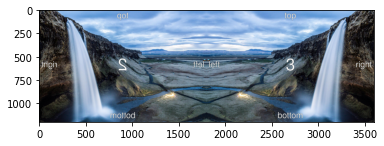

In [53]:
concat_img_pil.paste(image1, (0,0))
concat_img_pil.paste(image2, (image1.width, 0))
plt.imshow(concat_img_pil)



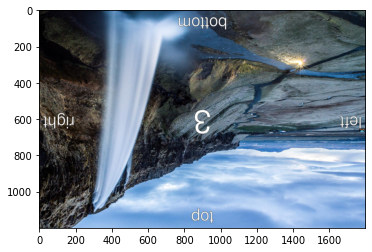

In [34]:
plt.imshow(imp2)

In [47]:
from PIL import ExifTags
try:
    image=imp1

    for orientation in ExifTags.TAGS.keys():
        if ExifTags.TAGS[orientation]=='Orientation':
            break
    
    exif = image._getexif()

    if exif[orientation] == 3:
        image=image.rotate(180, expand=True)
    elif exif[orientation] == 6:
        image=image.rotate(270, expand=True)
    elif exif[orientation] == 8:
        image=image.rotate(90, expand=True)

    image.save('new.jpeg')
    image.close()
except (AttributeError, KeyError, IndexError):
    # cases: image don't have getexif
    pass

In [ ]:
import subprocess
image='Landscape_2.jpeg'
exe='hachoir-metadata'
process=subprocess.Popen([exe,image],stdout=subprocess.PIPE,stderr=subprocess.STDOUT,universal_newlines=True)
data=process.stdout
for i in data:
    print(i.strip())